In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
pima_data = pd.read_csv('pima-indians-diabetes-2.data',names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

In [5]:
pima_data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
pima_data[~pima_data.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [16]:
pima_data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [18]:
pima_data.groupby('class').count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [20]:
pima_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


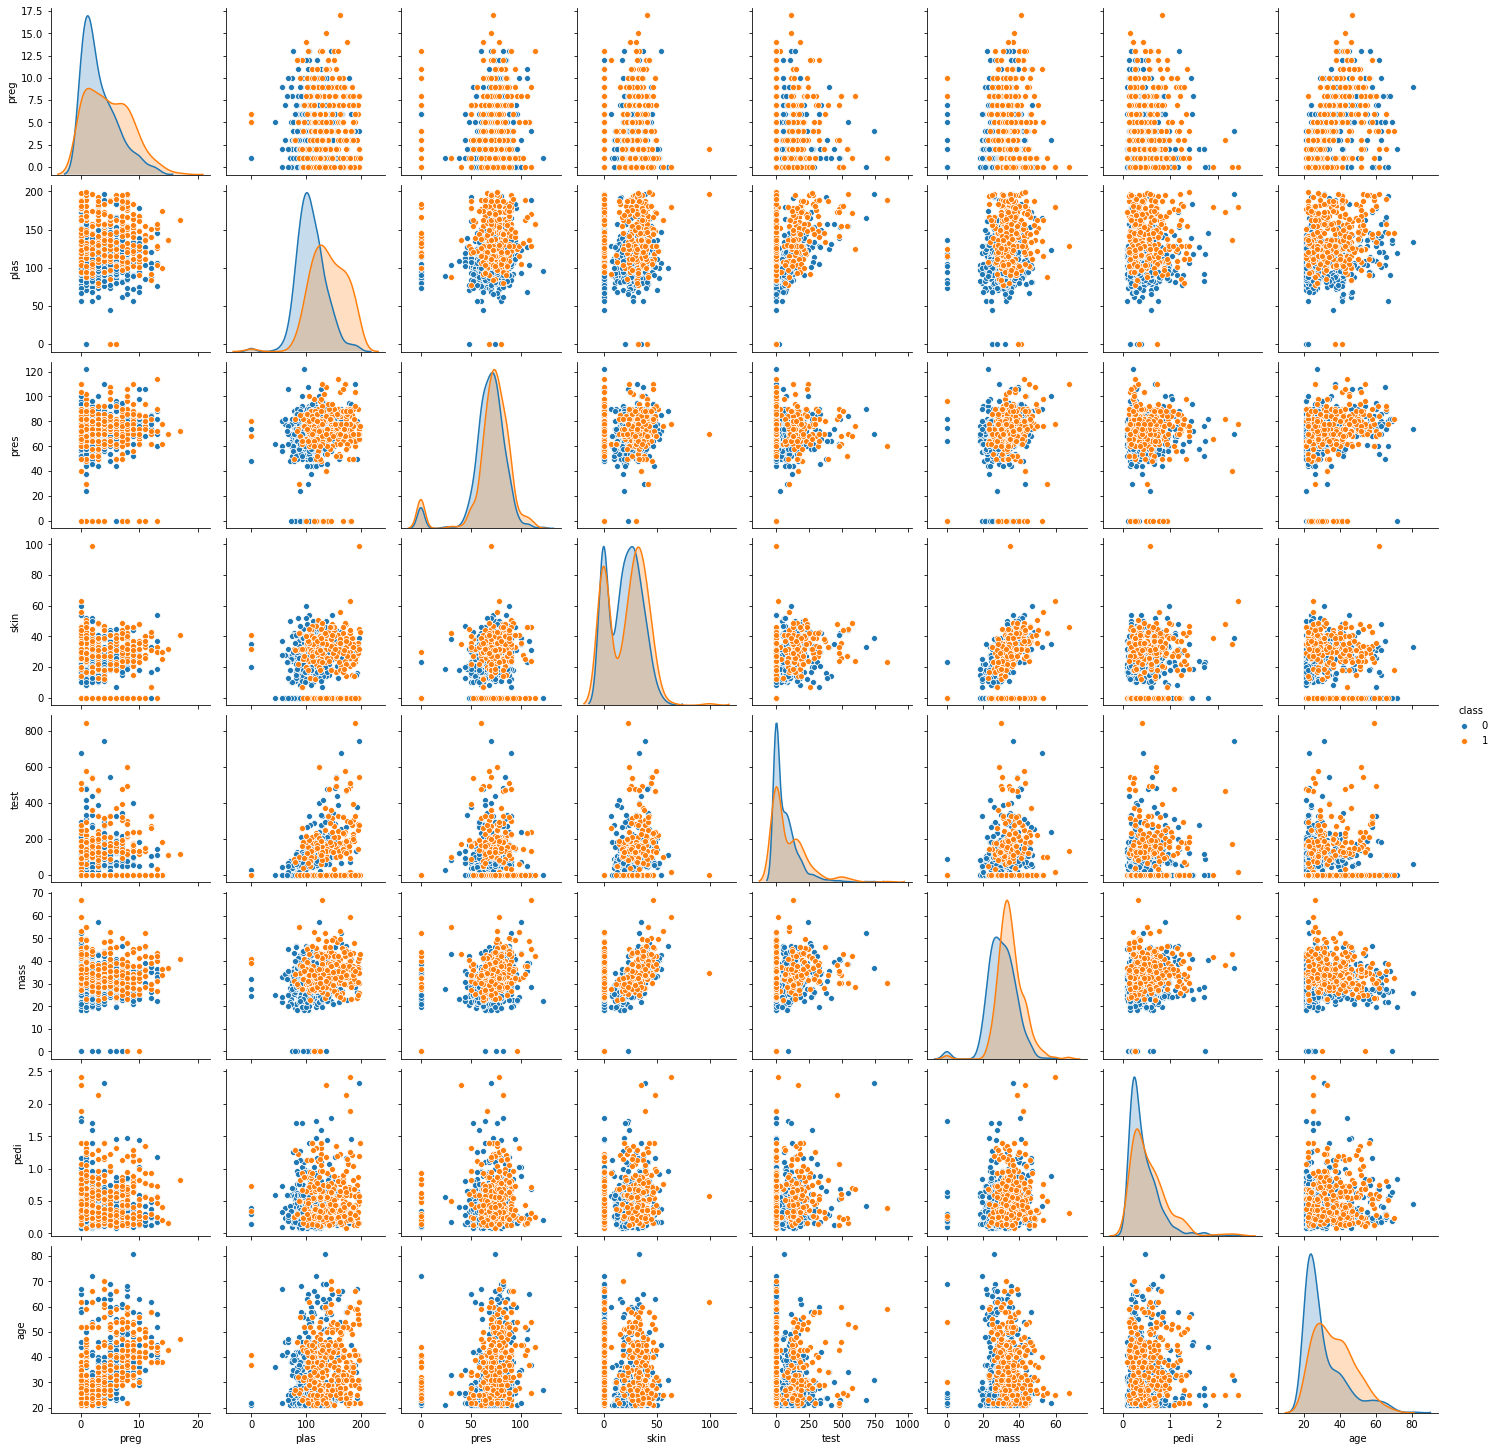

In [23]:
sns.pairplot(pima_data,diag_kind = 'kde',hue = 'class')
plt.show()

In [27]:
data_val = pima_data.values
x = data_val[:,0:7]
y = data_val[:,8]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 7)

In [28]:
model = LogisticRegression()

In [39]:
model.fit(x_train,y_train)

c:\users\aftab\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_predict = model.predict(x_test)
metrics.confusion_matrix(y_test,y_predict)

array([[131,  16],
       [ 39,  45]], dtype=int64)

In [42]:
model.score(x_test, y_test)

0.7619047619047619

In [43]:
from sklearn import preprocessing

In [44]:
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [45]:
model = LogisticRegression()

In [46]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [47]:
y_predict = model.predict(x_test_scaled)
metrics.confusion_matrix(y_test,y_predict)

array([[134,  13],
       [ 38,  46]], dtype=int64)

In [48]:
model.score(x_test_scaled, y_test)

0.7792207792207793